# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('real_estate_data.csv', sep='\t')

<i>Посмотрим на датасет в целом</i>

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<i>И на общую информацию о нём</i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<i>Переименуем некоторые столбцы для удобства (приведём их к общему виду)</i>

In [4]:
df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'}, inplace=True)

<i>Построим гистограммы для всех столбцов датафрейма</i>

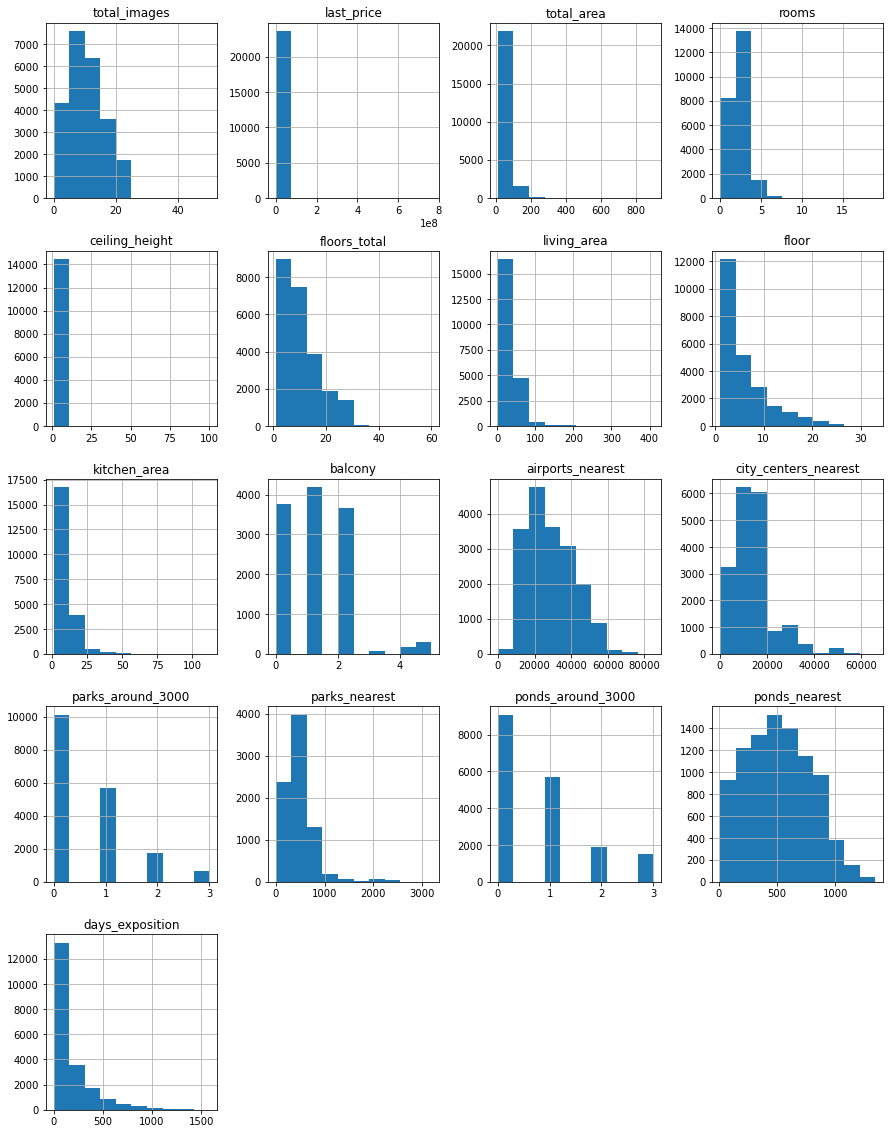

In [5]:
df.hist(figsize=(15, 20));


<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>На первый взгляд, в датафрейме много пропусков в разных столбцах (это видно из вывода info - много значений меньше 23699. Детальнее займёмся этим в следующем разделе. Что касается гистограмм - большинство данных имеет пуассоновское распределение, что, в целом, соответствует здравому смыслу. Крайне неинформативно выглядят гистограммы для переменных last_price и ceiling_height, видимо, в этих данных есть существенные выбросы. Примерно то же можно сказать и про столбцы total_area, rooms, kitchen_area, living_area (видимо, в данных есть либо квартиры очень большого размера, либо ошибки в данных - в любом случае, это тоже выбросы). Обработкой и анализом займёмся далее.</b></i>
</div>

### Предобработка данных

<h4>Изменение типов данных</h4>

<div style="border:solid black 1px; padding: 10px">
    <i>У некоторых данных можно изменить тип:
        <ul>
            <li>столбец first_day_exposition - это явно дата, можно привести к datetime (вероятно, понадобится нам для дальнейших расчётов, учитывая наличие переменной days_exposition в датасете</li>
            <li>is_apartment - явно булева переменная (возможно, пригодится в фильтрах)</li>
            <li>столбцы floors_total, balcony, days_exposition, parks_around_3000 и ponds_around_3000 по смыслу можно было бы привести к int64, но прямое приведение даст ошибку из-за наличия пустот в этих столбцах, да и какого-то существенного выигрыша это нам не даст, так что это оставим как есть</li>
        </ul>
    </i>
</div>

In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [7]:
df['is_apartment'] = df['is_apartment'].astype('bool')

<h4>Работа с пропусками</h4>

<i>Посчитаем общее количество пропусков в столбцах датафрейма</i>

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


<div style="border:solid black 1px; padding: 10px">
    <i>Попробуем разобраться с причинами пропусков.
        <ul>
            <li>Информация о размерах квартиры (жилая площадь, площадь кухни, высота потолков) могла быть не указана самими пользователями, так как эта информация, возможно, не являлась необходимой (особенно высота потолков - мало кто мог бы сразу её назвать без измерений, а они и не требуются). То же самое относится и к общему количеству этажей в доме - возможно, где-то эту информацию посчитали избыточной, а возможно, её можно было бы получить из другой (например, если было указано, что квартира находится на последнем этаже). Логичного единого способа заполнить такие данные нет, поэтому оставим их, как есть (по общему количеству этажей - отбросим)</li>
            <li>Насчёт населенного пункта - здесь причины выявить трудно, вероятнее всего, их так же просто не указали пользователи. К счастью, таких пропусков немного, поэтому эти строки можно отбросить</li>
            <li>Является ли помещение апартаментами - больше всего пропусков. Предполагаю, это связано с тем, что в большинстве случаев и так очевидно, жилое это помещение или апартаменты (часто указывают прямо в заголовке объявления), поэтому не считают нужным заполнять этот пункт. Конечно, вероятность того, что объявление относится к жилым помещениям, а не апартаментам, гораздо выше (среди тех объявлений, где параметр непустой, доля апартаментов - примерно 2%), однако заполнить все пропуски значением False было бы тоже неверным, тем более что этот столбец не является определяющим в нашем исследовании</li>
            <li>Количество балконов может быть не указано по простой причине - их просто могло не быть в продаваемой квартире, поэтому здесь заполним пустые значения нулями</li>
            <li>Причин отсутствия картографических данных может быть несколько. Это как и невозможность их предоставления в силу отсутствия подробных геоданных (особенно в отдалённых посёлках), так и технические ошибки в процессе выгрузки. Эти данные тоже не являются определяющими для нашего исследования, поэтому обрабатывать все пропуски здесь тоже не будем. Можно попробовать восстановить некоторые данные, руководствуясь здравым смыслом, однако успех здесь не гарантирован</li>
        </ul>
    </i>
</div>

<i>Данные с пропусками в столбцах floors_total и locality_name составляют очень малую часть выборки (сильно меньше 5%), поэтому от них можно избавиться, тем более что разумный способ заполнения пустот здесь придумать сложно</i>

In [10]:
df.dropna(subset=['floors_total', 'locality_name'], inplace=True)

<i>Заполним отсутствующие данные о количестве балконов в помещении нулями</i>

In [11]:
df['balcony'].fillna(0, inplace=True)

<i>Посмотрим, есть ли записи, где расстояние до ближайшего парка/водоёма больше 3000, а значение столбца с количеством парков/водоёмов в радиусе 3 км пустое. Если таковые имеются, логично заполнить эти поля нулями (спойлер: таковых не оказалось)</i>

In [12]:
len(df[(df['parks_nearest'] >= 3000) & (df['parks_around_3000'].isna()) | 
       (df['ponds_nearest'] >= 3000) & (df['ponds_around_3000'].isna())])

0

<i>Теперь пойдём от обратного: если в радиусе 3 км есть как минимум 1 парк/водоём, а значение в поле parks/ponds_nearest пустое, можно заполнить эти пустоты значением 3000</i>

In [13]:
len(df[(df['parks_around_3000'] > 0) & (df['parks_nearest'].isna()) | 
       (df['ponds_around_3000'] > 0) & (df['ponds_nearest'].isna())])

0

<i>К сожалению, и это не снискало успеха. На этом закончим с обработкой пропусков. Последним шагом проверим, что изменения были внесены в датафрейм</i>

In [14]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [15]:
import warnings

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for name in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == name, 'ceiling_height'].median()
        df.loc[((df['ceiling_height'].isna()) & (df['locality_name'] == name)), 'ceiling_height'] = median
    
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for name in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == name, 'city_centers_nearest'].median()
        df.loc[((df['city_centers_nearest'].isna()) & (df['locality_name'] == name)), 'city_centers_nearest'] = median

<h4>Обработка дубликатов</h4>

<i>Посчитаем количество полных дубликатов</i>

In [18]:
df.duplicated().sum()

0

<i>Полных дубликатов нет, это хорошо. Согласно задаче посмотрим уникальные значения в столбце с названиями населённого пункта</i>

In [19]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

<i>В столбце точно есть неявные дубликаты. Унифицируем названия населённых пунктов: заменим везде букву "ё" на "е" во избежание путаницы, а также уберём не являющиеся необходимыми для идентификации населённого пункта обозначения (как "деревня" или "село"), где это возможно. Результат сохраним в столбце new_locality_name</i>

In [20]:
def keep_names_only(fullname):
    result = fullname.replace('ё', 'е')
    prefixes = ['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок городского типа ', 
                'поселок при железнодорожной станции ', 'поселок станции ', 'поселок ',
                'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ']
    for prefix in prefixes:
        if (prefix in result) and (not 'имени' in result):
            return result.replace(prefix, '')
    return result

In [21]:
df['new_locality_name'] = df['locality_name'].apply(func=keep_names_only)
df['new_locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

<i>Названия населённых пунктов в таком виде выглядят гораздо лучше. Перейдём к устранению аномалий в датасете</i>

<h4>Устранение аномалий</h4>

<div style="border:solid black 1px; padding: 10px"><i>Посмотрим основные статистики для столбцов</i></div>

In [22]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18133.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.733740,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14195.267882,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.012203,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8610.213514,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9265.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13073.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16275.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<i>Начнём с количества комнат. Уберём из датафрейма данные, где указано 0 комнат - это явно ошибочные данные</i>

In [23]:
df = df.query('rooms > 0')

<i>Теперь наоборот посмотрим на объявления с очень большим количеством комнат. Выведем, какие квартиры имеют 7 и более комнат</i>

In [24]:
df.query('rooms >= 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,new_locality_name
581,20,65000000.0,365.0,2019-03-18,7,2.90,7.0,NaN,7,True,...,0.0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,Санкт-Петербург
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,True,...,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,Санкт-Петербург
681,20,24900000.0,249.0,2015-08-13,7,2.70,5.0,180.0,4,True,...,1.0,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0,Санкт-Петербург
750,9,29500000.0,188.8,2017-03-04,7,2.70,2.0,119.3,1,True,...,0.0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22264,20,22000000.0,141.0,2019-01-24,7,2.70,5.0,84.0,2,True,...,0.0,Санкт-Петербург,20243.0,3334.0,2.0,447.0,1.0,468.0,90.0,Санкт-Петербург
22420,12,25000000.0,196.0,2016-11-04,7,3.50,6.0,145.0,5,True,...,1.0,Санкт-Петербург,25083.0,3658.0,1.0,552.0,0.0,NaN,NaN,Санкт-Петербург
22649,18,22900000.0,206.0,2016-04-04,7,2.70,6.0,142.0,2,True,...,0.0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,75.0,Санкт-Петербург
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5.0,151.4,5,True,...,0.0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0,Санкт-Петербург


<i>Почти везде указано, что это апартаменты - это явно не то, что мы хотим видеть (вероятно, офисные помещения или помещения иного коммерческого назначения?). Посчитаем долю апартаментов от таких квартир:</i>

In [25]:
len(df[(df['rooms'] >= 7) & df['is_apartment']]) / len(df[(df['rooms'] >= 7)])

0.9555555555555556

<i>Апартаментов среди таких "квартир" больше 95%, поэтому можем смело удалять эти строки</i>

In [26]:
df = df.query('rooms < 7')

In [27]:
df.query('last_price.round() != last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,new_locality_name


In [28]:
df['last_price'] = df['last_price'].astype('int64')

<i>В обычной квартире вряд ли может быть больше 2 балконов. Посмотрим, какую долю составляют квартиры с 3 и более балконами</i>

In [29]:
len(df.query('balcony >= 3')) / len(df)

0.024225763498131523

<i>Получаем меньше 3% - убираем и эти аномальные значения</i>

In [30]:
df = df.query('balcony < 3')

<i>Высота потолков больше 5 метров в квартире - это явно что-то странное. Посмотрим на эти строки</i>

In [31]:
df[df['ceiling_height'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,new_locality_name
313,1,2450000,49.0,2016-03-09,3,13.85,5.0,34.0,2,True,...,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Новый Свет
355,17,3600000,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,...,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Гатчина
464,15,66571000,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,...,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,Санкт-Петербург
1026,20,155000000,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,...,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,Санкт-Петербург
1388,20,59800000,399.0,2015-01-21,5,5.60,6.0,NaN,6,True,...,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,Санкт-Петербург
2158,15,1500000,42.0,2017-12-23,2,27.00,2.0,29.0,2,True,...,0.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Мины
3148,14,2900000,75.0,2018-11-12,3,32.00,3.0,53.0,2,True,...,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Волхов
3474,3,1400000,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,Нурма
4643,0,4300000,45.0,2018-02-01,2,25.00,9.0,30.0,2,True,...,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,Санкт-Петербург
5076,0,3850000,30.5,2018-10-03,1,24.00,5.0,19.5,1,True,...,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Санкт-Петербург


<i>Похоже, здесь закралась ошибка в данных - высота потолков увеличена в 10 раз там, где высота потолков - 20 и больше. Исправим это недоразумение</i>

In [32]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x / 10 if x > 20 else x)

In [33]:
df.query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,new_locality_name
313,1,2450000,49.0,2016-03-09,3,13.85,5.0,34.0,2,True,...,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Новый Свет
464,15,66571000,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,...,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,Санкт-Петербург
1026,20,155000000,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,...,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,Санкт-Петербург
1388,20,59800000,399.0,2015-01-21,5,5.60,6.0,NaN,6,True,...,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,Санкт-Петербург
3474,3,1400000,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,Нурма
5863,20,5650000,45.0,2018-08-15,1,8.30,16.0,19.3,14,True,...,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,Санкт-Петербург
7578,17,38000000,143.0,2017-11-02,3,5.50,5.0,83.0,5,True,...,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,Санкт-Петербург
10067,5,2100000,36.1,2016-04-29,1,13.85,5.0,17.5,5,True,...,0.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0,Новый Свет
10069,6,2000000,46.0,2017-09-25,2,13.85,5.0,30.0,1,True,...,0.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Новый Свет
12628,14,3900000,50.0,2018-03-29,1,5.30,5.0,NaN,5,True,...,0.0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,Санкт-Петербург


<i>И снова несколько нежилых помещений. Уберём и эти данные</i>

In [34]:
df = df.query('(ceiling_height <= 5) or ceiling_height.isna()')

<i>Часто в дальнейшем масштаб наших графиков будут искажать очень дорогие квартиры - стоимостью больше 100 миллионов. Посмотрим, сколько их всего в наборе, и, если немного - отбросим и их</i>

In [35]:
df.query('last_price > 100000000')['last_price'].count()

26

In [36]:
df = df.query('last_price <= 100000000')

<i>Посмотрим статистики по очищенным данным</i>

In [37]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,22676.000000,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,20868.000000,22676.000000,20682.000000,22676.000000,17354.000000,17441.000000,17377.000000,7693.000000,17377.000000,8666.000000,19659.000000
mean,9.849753,6.113393e+06,58.929805,2.045952,2.699471,10.601870,33.622009,5.822014,10.410237,0.497045,28813.826150,14242.224270,0.607872,490.271026,0.764919,519.921417,180.665497
std,5.656149,6.129724e+06,30.550750,0.987421,0.217722,6.568307,19.381845,4.833536,5.558786,0.751413,12662.594171,8632.895742,0.799331,341.991692,0.935251,277.947740,219.615747
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,18539.000000,9328.000000,0.000000,288.000000,0.000000,295.250000,45.000000
50%,9.000000,4.600000e+06,51.390000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26764.000000,13107.000000,0.000000,454.000000,0.000000,504.000000,95.000000
75%,14.000000,6.672500e+06,68.300000,3.000000,2.700000,15.000000,42.000000,8.000000,11.850000,1.000000,37310.000000,16293.000000,1.000000,612.000000,1.000000,731.000000,231.000000
max,50.000000,9.900000e+07,507.000000,6.000000,5.000000,60.000000,301.500000,33.000000,100.700000,2.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1572.000000


In [38]:
df.query('floors_total.round() != floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,new_locality_name


In [39]:
df['floors_total'] = df['floors_total'].astype('int64')

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
<i><b>Благодаря предобработке наши данные стали более пригодными для анализа. Мы почистили данные от выбросов и странных значений. Продолжим работу над датасетом</b></i>
</div>

### Посчитайте и добавьте в таблицу новые столбцы

<i>Посчитаем цену 1 квадратного метра: сохраним данные в столбце m2_price</i>

In [40]:
df['m2_price'] = df['last_price'] / df['total_area']

<i>Добавим столбец weekday_of_exposition - день недели публикации объявления</i>

In [41]:
df['weekday_of_exposition'] = df['first_day_exposition'].dt.weekday

<i>Аналогично поступим с месяцем (столбец month_of_exposition)</i>

In [42]:
df['month_of_exposition'] = df['first_day_exposition'].astype('datetime64[M]')

<i>И годом (столбец year_of_exposition)</i>

In [43]:
df['year_of_exposition'] = df['first_day_exposition'].dt.year

<i>Рассчитаем тип этажа квартиры (столбец floor_type), где это возможно, используя вспомогательную функцию get_floor_type. Заодно сделаем "оцифрованную" копию этого столбца</i>

In [44]:
def get_floor_type(row):
    if (~pd.isna(row['floors_total']) & ~pd.isna(row['floor'])):
        if (row['floor'] == 1):
            return 'Первый', 0
        elif (row['floors_total'] == row['floor']):
            return 'Последний', 2
        else:
            return 'Другой', 1

In [45]:
df['floor_type'] = df.apply(get_floor_type, axis=1)
df['floor_type'], df['floor_type_digit'] = zip(*df['floor_type'])

<i>Добавим расстояние до центра города в километрах. Данные положим в столбец city_centers_nearest_km</i>

In [46]:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()

In [47]:
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].astype('Int64')

<i>Посмотрим на полученные данные. Всё сработало как следует</i>

In [48]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,new_locality_name,m2_price,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_type,floor_type_digit,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.700,16,51.0,8,True,...,755.0,NaN,Санкт-Петербург,120370.370370,3,2019-03-01,2019,Другой,1,16
1,7,3350000,40.40,2018-12-04,1,2.615,11,18.6,1,True,...,NaN,81.0,Шушары,82920.792079,1,2018-12-01,2018,Первый,0,19
2,10,5196000,56.00,2015-08-20,2,2.700,5,34.3,4,True,...,574.0,558.0,Санкт-Петербург,92785.714286,3,2015-08-01,2015,Другой,1,14
3,0,64900000,159.00,2015-07-24,3,2.700,14,NaN,9,True,...,234.0,424.0,Санкт-Петербург,408176.100629,4,2015-07-01,2015,Другой,1,7
4,2,10000000,100.00,2018-06-19,2,3.030,14,32.0,13,True,...,48.0,121.0,Санкт-Петербург,100000.000000,1,2018-06-01,2018,Другой,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.700,5,73.3,3,True,...,381.0,NaN,Санкт-Петербург,72490.845228,1,2017-03-01,2017,Другой,1,4
23695,14,3100000,59.00,2018-01-15,3,2.500,5,38.0,4,True,...,NaN,45.0,Тосно,52542.372881,0,2018-01-01,2018,Другой,1,<NA>
23696,18,2500000,56.70,2018-02-11,2,2.700,3,29.7,1,True,...,NaN,NaN,Рождествено,44091.710758,6,2018-02-01,2018,Первый,0,<NA>
23697,13,11475000,76.75,2017-03-28,2,3.000,17,NaN,12,True,...,196.0,602.0,Санкт-Петербург,149511.400651,1,2017-03-01,2017,Другой,1,10


<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
<i><b>Мы добавили в таблицу несколько столбцов, которые помогут нам для дальнейшего исследования и анализа. Переходим к нему в следующем разделе</b></i>
</div>

### Проведите исследовательский анализ данных

<h4>Исследование параметров</h4>

<i>Выделим нужные нам параметры в отдельный датафрейм, посмотрим статистики по ним и построим гистограммы</i>

In [49]:
df_parameters = df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 
                    'floor', 'floor_type_digit', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 
                    'weekday_of_exposition', 'month_of_exposition']]

In [50]:
df_parameters.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floor_type_digit,floors_total,city_centers_nearest,airports_nearest,parks_nearest,weekday_of_exposition
count,22676.000000,20868.000000,20682.000000,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,17441.000000,17354.000000,7693.000000,22676.000000
mean,58.929805,33.622009,10.410237,6.113393e+06,2.045952,2.699471,5.822014,1.015567,10.601870,14242.224270,28813.826150,490.271026,2.566590
std,30.550750,19.381845,5.558786,6.129724e+06,0.987421,0.217722,4.833536,0.516860,6.568307,8632.895742,12662.594171,341.991692,1.788416
min,12.000000,2.000000,1.300000,1.219000e+04,1.000000,1.000000,1.000000,0.000000,1.000000,181.000000,0.000000,1.000000,0.000000
25%,40.000000,18.500000,7.000000,3.400000e+06,1.000000,2.550000,2.000000,1.000000,5.000000,9328.000000,18539.000000,288.000000,1.000000
50%,51.390000,30.000000,9.000000,4.600000e+06,2.000000,2.700000,4.000000,1.000000,9.000000,13107.000000,26764.000000,454.000000,3.000000
75%,68.300000,42.000000,11.850000,6.672500e+06,3.000000,2.700000,8.000000,1.000000,15.000000,16293.000000,37310.000000,612.000000,4.000000
max,507.000000,301.500000,100.700000,9.900000e+07,6.000000,5.000000,33.000000,2.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000


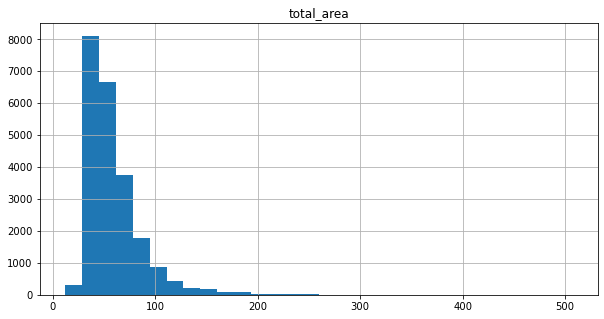

In [51]:
df_parameters.hist(column='total_area', bins=30, figsize=(10, 5));

<i>Распределение общей выглядит естественно - ничего подозрительного</i>

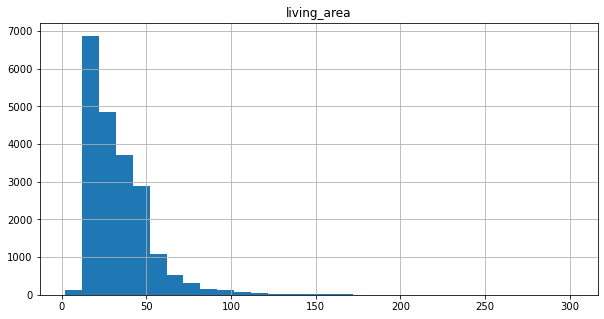

In [52]:
df_parameters.hist(column='living_area', bins=30, figsize=(10, 5));

<i>Логично предположить, что в таком случае жилая площадь и площадь кухни также будут естественно распределены (по Пуассону с разным средним)</i>

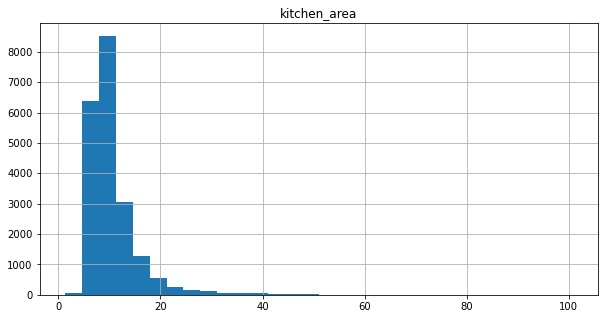

In [53]:
df_parameters.hist(column='kitchen_area', bins=30, figsize=(10, 5));

<i>Так и есть</i>

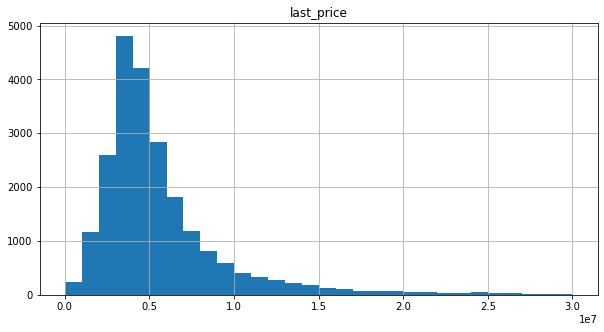

In [54]:
df_parameters[df_parameters['last_price'] <= 30000000].hist(column='last_price', bins=30, figsize=(10, 5));

<i>Здесь для наглядности графика убрали очень высокие значения, чтобы лучше рассмотреть распределение. Выглядит закономерно, самое большое число квартир - стоимостью до 5-6 миллионов рублей (чаще всего встречаются цифры в районе 3-4 миллионов)</i>

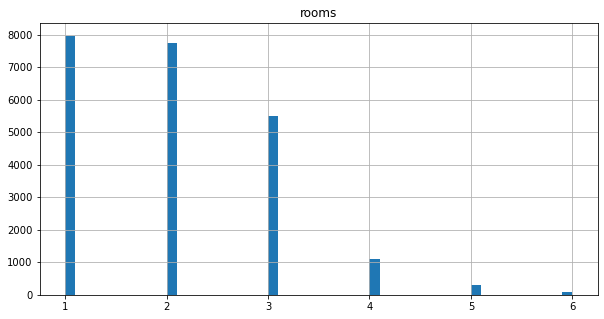

In [55]:
df_parameters.hist(column='rooms', bins=50, figsize=(10, 5));

<i>Количество объявлений убывает с увеличением количества числа комнат. Это верно, ведь гораздо чаще встречаются однокомнатные или двухкомнатные квартиры (в наших данных их количество почти одинаково). Квартир с 4 и более комнатами - очень маленький процент</i>

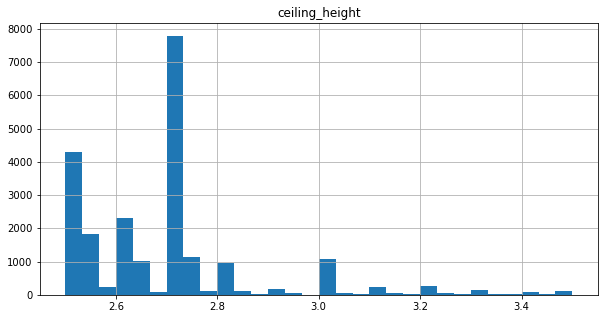

In [56]:
df_parameters[(df_parameters['ceiling_height'] >= 2.5) & (df_parameters['ceiling_height'] <= 3.5)].hist(column='ceiling_height', bins=30, figsize=(10, 5));

<i>В массовом сегменте высота потолков 2.7 м - это стандарт, который мы видим и на нашем графике. Есть ещё большая доля около 2.5 м - такие потолки делали в "хрущёвках"</i>

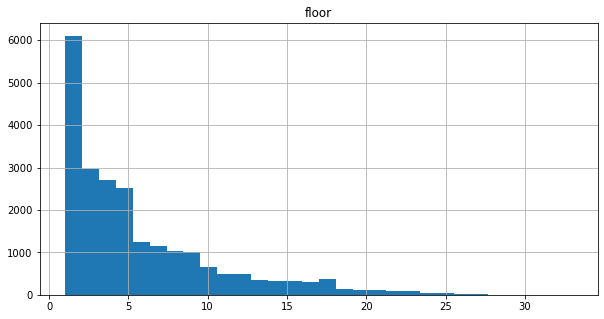

In [57]:
df_parameters.hist(column='floor', bins=30, figsize=(10, 5));

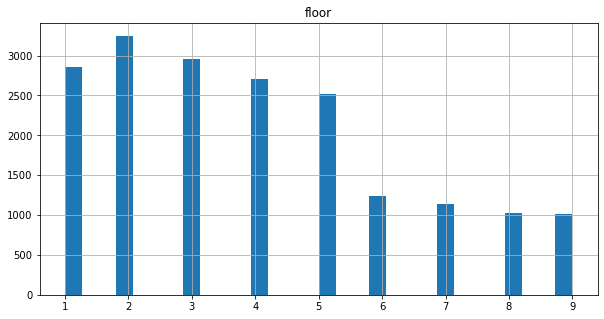

In [58]:
df_parameters[df_parameters['floor'] < 10].hist(column='floor', bins=30, figsize=(10, 5));

<i>Чаще всего продавались квартиры на 1-5 этажах, после 6 этажа и выше - гораздо меньше объявлений. Это тоже объяснимо, ведь 1-5 этажи есть почти в любом многоэтажном доме, а вот 9 этажа, например, нет в тех же пятиэтажках</i>

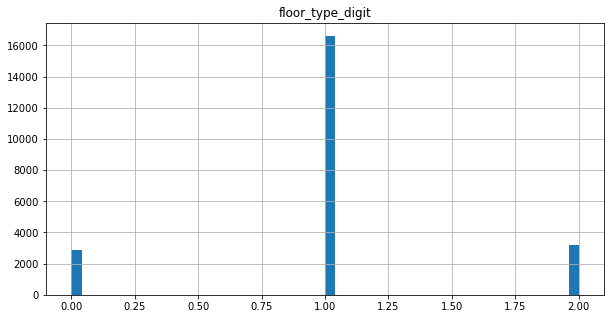

In [59]:
df_parameters.hist(column='floor_type_digit', bins=50, figsize=(10, 5));

<i>Тип этажа "Другой" превалирует над остальными (первым и последним). Это логично, так как в многоэтажных домах таких квартир больше</i>

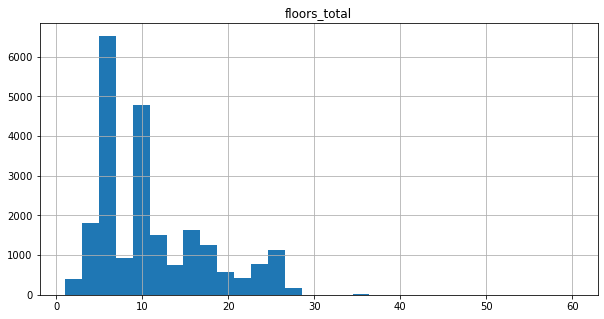

In [60]:
df_parameters.hist(column='floors_total', bins=30, figsize=(10, 5));

<i>В гистограмме по общему количеству этажей есть два пика - это 5- и 9-этажные дома. Тоже ничего удивительного, учитывая массовость построек таких домов в недалёком прошлом (местами - и в настоящем)</i>

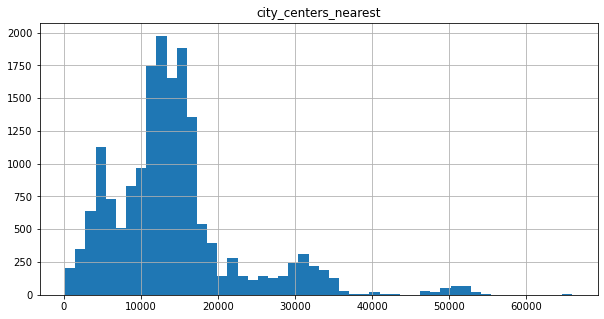

In [61]:
df_parameters.hist(column='city_centers_nearest', bins=50, figsize=(10, 5));

<i>Больше всего квартир в пределах от 10 до 20 км от центра</i>

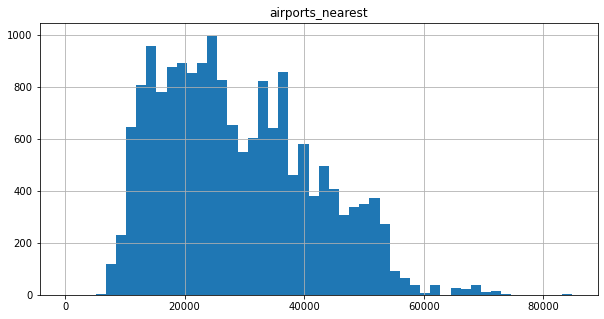

In [62]:
df_parameters.hist(column='airports_nearest', bins=50, figsize=(10, 5));

<i>Здесь среднее больше 20 км, что тоже неудивительно - аэропорты находятся в относительной удалённости от городов</i>

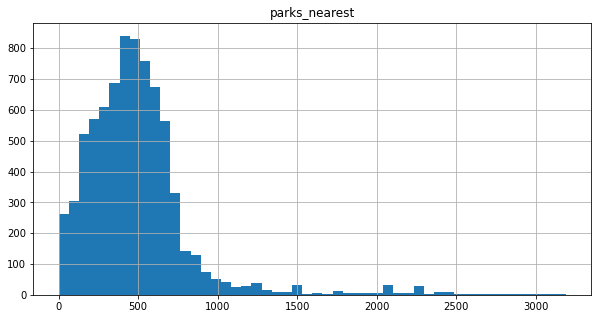

In [63]:
df_parameters.hist(column='parks_nearest', bins=50, figsize=(10, 5));

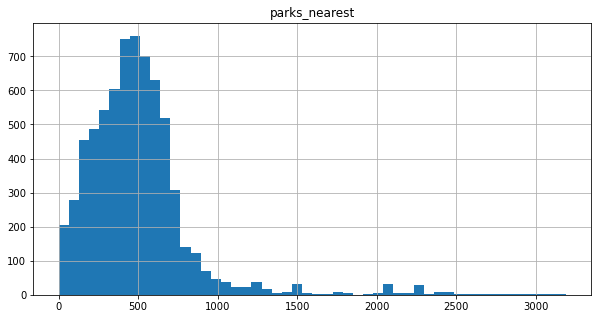

In [64]:
df_parameters[df['new_locality_name'] == 'Санкт-Петербург'].hist(column='parks_nearest', bins=50, figsize=(10, 5));

<i>В подавляющем большинстве объявлений есть парки в пределах одного километра. Для области это естественно, а вот то, что почти такой же результат и для Санкт-Петербурга - приятное открытие</i>

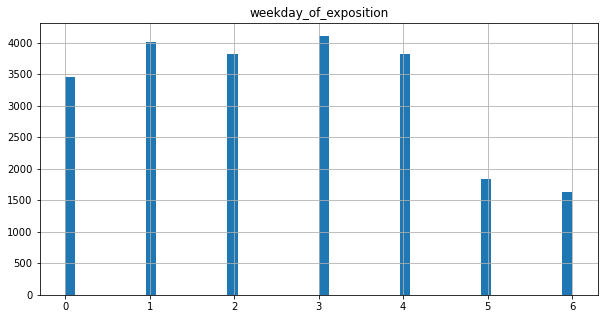

In [65]:
df_parameters.hist(column='weekday_of_exposition', bins=50, figsize=(10, 5));

<i>Значительно меньшее количество объявлений публикуется по выходным. Возможно, это связано с тем, что владельцы квартир заняты в эти дни другими делами</i>

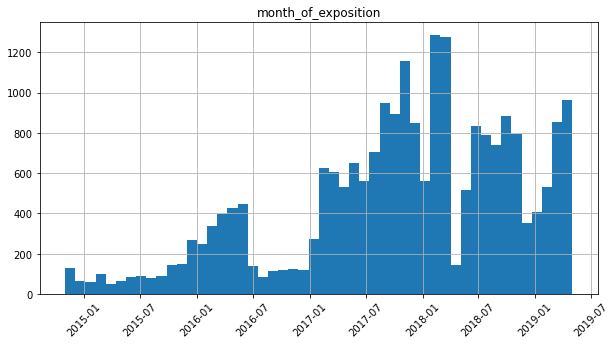

In [66]:
df_parameters.hist(column='month_of_exposition', bins=50, xrot=45, figsize=(10, 5));

<i>Наблюдаем стабильный рост числа объявлений до 2018 года, потом - небольшое снижение. Здесь ещё примечателен провал во второй половине 2016 года - возможно, были выгружены не все данные за этот период</i>

<h4>Изучение времени продажи квартиры</h4>

<i>Построим гистограмму по столбцу days_exposition</i>

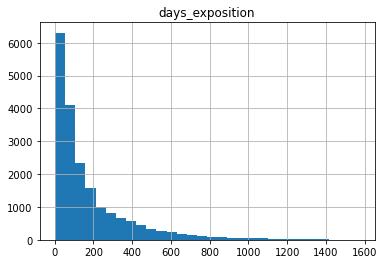

In [67]:
df.hist(column='days_exposition', bins=30);

<i>Подавляющее большинство сделок осуществляется за 200 дней и быстрее, что логично, ведь это довольно большой срок - более полугода. Рассмотрим этот срез отдельно</i>

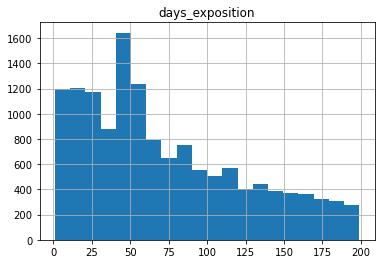

In [68]:
df[df['days_exposition'] < 200].hist(column='days_exposition', bins=20);

<i>В целом, закономерность просматривается (чем больше проходит времени - тем меньше остаётся объявлений). Есть довольно много объявлений с очень небольшим сроком (меньше 10 дней), посмотрим на них более пристально</i>

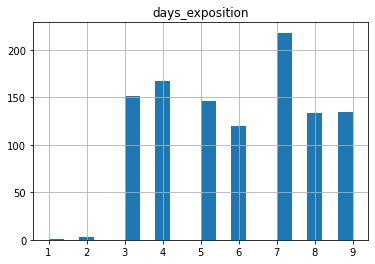

In [69]:
df[df['days_exposition'] < 10].hist(column='days_exposition', bins=20);

<i>Есть несколько объявлений, закрывшихся за 1-2 дня - это очень мало. У остальных распределение примерно одинаковое. Посмотрим на общие статистики по столбцу</i>

In [70]:
df['days_exposition'].describe()

count    19659.000000
mean       180.665497
std        219.615747
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1572.000000
Name: days_exposition, dtype: float64

<i>Среднее время продажи квартиры - 180 дней, около полугода. Это довольно большое число, на которое явно влияют выбросы - некоторые объявления висят около 5 лет. Однако на самом деле большинство сделок закрывается за несколько месяцев (больше половины - в пределах 3 месяцев), а объявления, висящие больше года - необычно долгие</i>

<h4>Зависимость стоимости объекта от различных факторов</h4>

<i>Посчитаем коэффициент корелляции (там, где это имеет смысл) и построим графики зависимости стоимости жилья от различных факторов</i>

In [71]:
for factor in ['total_area', 'living_area', 'kitchen_area', 'rooms']:
    print('Коэффициент корреляции с параметром {} равен {}'.format(factor, df['last_price'].corr(df[factor])))    

Коэффициент корреляции с параметром total_area равен 0.7566903906483441
Коэффициент корреляции с параметром living_area равен 0.6675683564442311
Коэффициент корреляции с параметром kitchen_area равен 0.5843891289279342
Коэффициент корреляции с параметром rooms равен 0.4447020114922195


<i>Самая сильная зависимость стоимости жилья - с общей площадью, что закономерно. Жильё большей площади будет стоить дороже, и связаны эти факторы крепко - на общую площадь смотрят в первую очередь. От жилой площади и площади кухни по отдельности зависимость меньше. С общим числом комнат корреляция тоже слабая</i>

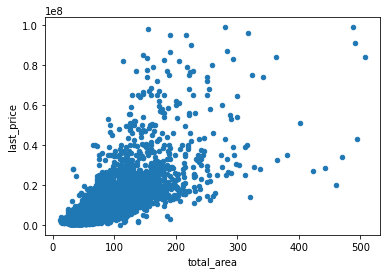

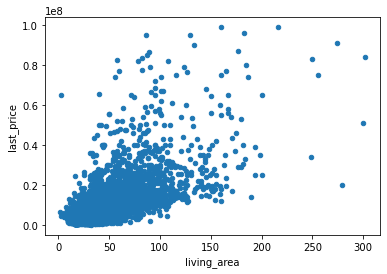

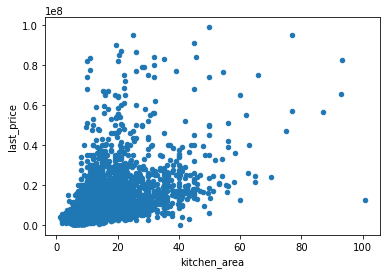

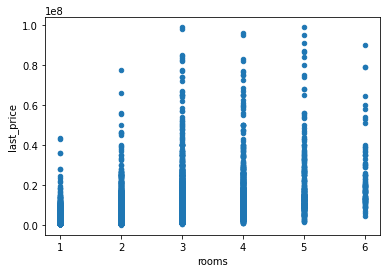

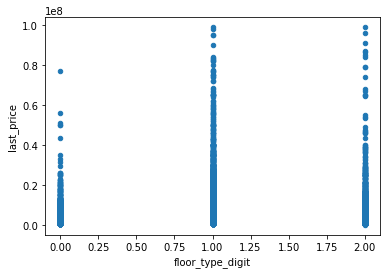

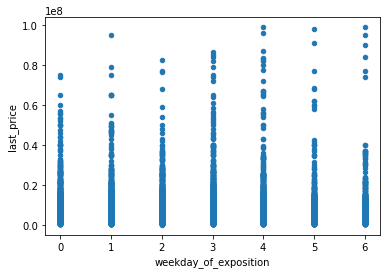

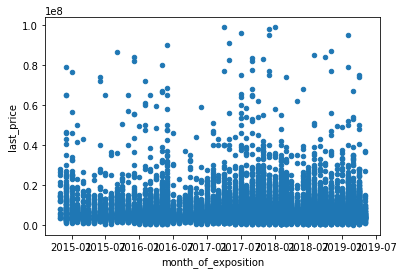

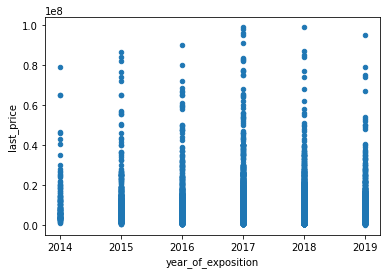

In [72]:
for factor in ['total_area', 'living_area', 'kitchen_area', 'rooms', 
               'floor_type_digit', 'weekday_of_exposition', 'month_of_exposition', 'year_of_exposition']:    
    df.plot(x=factor, y='last_price', kind='scatter')

<i>Графики подтвердили наш вывод касательно первых трёх факторов. 
    <ul>
        <li>Что касается количества комнат - цена квартиры растёт с ростом числом комнат, но не постоянно. Большее количество дорогих квартир находится среди трёх- и четырёхкомнатных - наверное, потому что таких квартир в принципе больше, чем пятикомнатных и далее</li>
        <li>Стоимость квартиры наибольшая, если это не первый и не последний этаж. Самые недорогие квартиры - на первом этаже</li>
        <li>Зависимость от дня неделя следующая: наибольшая средняя стоимость квартиры в объявлениях, опубликованных в понедельник и четверг, на выходных наблюдается спад</li>
        <li>Что касается месяца объявления - чёткой тенденции не прослеживается, есть лишь некоторые локальные пики в середине года (июнь) и конце года (ноябрь-декабрь). В эти месяцы продаётся больше дорогих квартир</li>
        <li>По году объявления - наблюдался рост до 2017 года и падение после него</li>
    </ul>
</i>

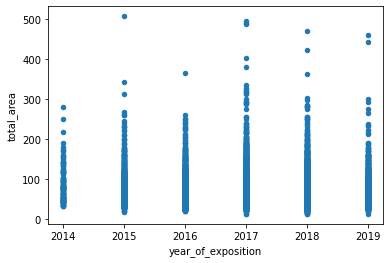

In [73]:
df.plot(x='year_of_exposition', y='total_area', kind='scatter');

<h4>Подсчёт средней цены квадратного метра среди населённых пунктов с наибольшим числом объявлений</h4>

<i>Сгруппируем данные по названию населённого пункта, сразу посчитаем количество объявлений и среднюю цену за квадратный метр для каждого из них. Переименуем "двухэтажные" столбцы</i>

In [74]:
df_top10 = df.pivot_table(index='new_locality_name', values='m2_price', aggfunc=['count', 'median'])
df_top10.columns = ['total', 'median_m2_price']

<i>Отсортируем данные по убыванию количества объявлений и возьмём первые 10 строк</i>

In [75]:
df_top10 = df_top10.sort_values(by='total', ascending=False).head(10)

<i>Отсортируем по убыванию средней цены за квадратный метр</i>

In [76]:
df_top10.sort_values(by='median_m2_price', ascending=False)

,total,median_m2_price
new_locality_name,,
Санкт-Петербург,15035,104411.764706
Пушкин,357,99744.245524
Кудрово,442,95267.011197
Парголово,322,91984.436588
Мурино,545,85428.571429
Шушары,425,76923.076923
Колпино,326,74516.267123
Гатчина,296,67671.510409
Всеволожск,376,65789.473684


<i>Неудивительно, что самая высокая цена за квадратный метр - в областном центре, Санкт-Петербурге, однако и в ближайших пригородах она вполне сопоставима. Дешевле всего квадратный метр стоит в Выборге - почти в два раза меньше, чем в Санкт-Петербурге</i>

<h4>Определение средней цены за километр расстояния от центра в Санкт-Петербурге</h4>

<i>Изменим формат отображения дробных чисел до двух знаков после запятой</i>

In [77]:
pd.options.display.float_format = '{:,.2f}'.format

<i>Рассчитаем цену 1 км до центра для всех объявлений из Санкт-Петербурга, исключая те, где расстояния до центра меньше 1 км - при округлении мы получили тут 0, а значит, надо избежать деления на него</i>

In [78]:
df.loc[(df['new_locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest_km'] > 0), 'to_center_1km_price'] = df['last_price'] / df['city_centers_nearest_km']

In [79]:
df_spb = df[(df['new_locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest_km'] > 0)]

In [80]:
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,new_locality_name,m2_price,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_type,floor_type_digit,city_centers_nearest_km,to_center_1km_price
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,NaN,Санкт-Петербург,"120,370.37",3,2019-03-01,2019,Другой,1,16,"812,500.00"
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,True,...,558.00,Санкт-Петербург,"92,785.71",3,2015-08-01,2015,Другой,1,14,"371,142.86"
3,0,64900000,159.00,2015-07-24,3,2.70,14,NaN,9,True,...,424.00,Санкт-Петербург,"408,176.10",4,2015-07-01,2015,Другой,1,7,"9,271,428.57"
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,121.00,Санкт-Петербург,"100,000.00",1,2018-06-01,2018,Другой,1,8,"1,250,000.00"
7,5,7915000,71.60,2019-04-18,2,2.70,24,NaN,22,True,...,NaN,Санкт-Петербург,"110,544.69",3,2019-04-01,2019,Другой,1,12,"659,583.33"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,True,...,29.00,Санкт-Петербург,"100,566.57",2,2018-02-01,2018,Другой,1,16,"221,875.00"
23690,3,5500000,52.00,2018-07-19,2,2.70,5,31.00,2,True,...,15.00,Санкт-Петербург,"105,769.23",3,2018-07-01,2018,Другой,1,6,"916,666.67"
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,True,...,519.00,Санкт-Петербург,"129,903.98",3,2016-10-01,2016,Другой,1,4,"2,367,500.00"
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,True,...,NaN,Санкт-Петербург,"72,490.85",1,2017-03-01,2017,Другой,1,4,"2,425,000.00"


<i>Построим график зависимости стоимости жилья от расстояния до центра. По идее, должны получить что-то похожее на график обратной пропорциональности, так как эти величины так и связаны</i>

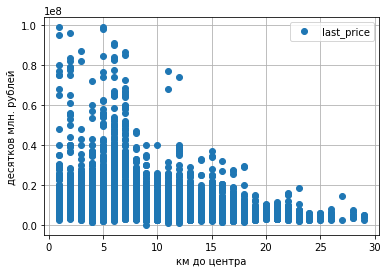

In [81]:
df_spb.plot(x='city_centers_nearest_km', y='last_price', style='o', xlabel='км до центра', ylabel='десятков млн. рублей', grid=True);

<i>Так и есть, форма графика ожидаема. Логично, что чем ближе ты к центру - тем дороже жильё, а значит, стоимость жилья будет выше. Хотя в среднем, похоже, с 20 до 40 километров от центра стоимость не сильно меняется (и даже есть выбросы в этой категории). В целом, это тоже ожидаемо, так как в любом случае расстояние больше 20 км - это уже сильно далеко от центра, и поэтому здесь влияние этого фактора угасает. Рассчитаем среднюю цену за 1 километр от центра</i>

In [82]:
df_spb['to_center_1km_price'].mean()

1177768.644399531

<i>Ого, больше миллиона за 1 километр! Это довольно большое значение, на которое наверняка влияют выбросы. Рассмотрим медиану - более информативную в нашем случае характеристику</i>

In [83]:
df_spb['to_center_1km_price'].median()

442540.10695187165

<i>Да, меньше полумиллиона - уже более адекватное значение. Но все равно цифра довольно высока. Что и говорить, жить близко к центру мегаполиса - удовольствие не из дешёвых!</i>

In [84]:
df_spb_pivot = df_spb.pivot_table(index='city_centers_nearest_km', values='to_center_1km_price', aggfunc='median')

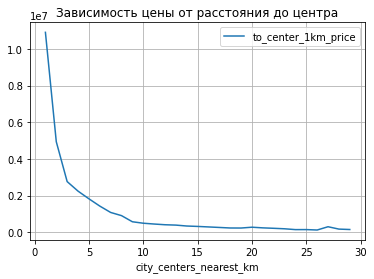

In [88]:
df_spb_pivot.plot(grid = True, title='Зависимость цены от расстояния до центра');

In [87]:
df_spb.query('city_centers_nearest_km == 27', engine='python')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,new_locality_name,m2_price,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_type,floor_type_digit,city_centers_nearest_km,to_center_1km_price
748,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,True,...,128.00,Санкт-Петербург,"193,918.92",1,2017-11-01,2017,Другой,1,27,"531,481.48"
5961,6,2250000,32.00,2018-02-27,1,2.70,2,16.50,2,True,...,178.00,Санкт-Петербург,"70,312.50",1,2018-02-01,2018,Последний,2,27,"83,333.33"


<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Мы исследовали большое количество параметров. Все из них распределены естественно, в соответствии со здравым смыслом. Сделали несколько выводов, например, о том, что стоимость жилья наибольшим образом зависит от его площади, а с параметром "количество комнат" коррелирует в куда меньшей степени. Изучили, как распределено количество квартир по времени продажи, нашли среднюю стоимость квадратного метра. Подробнее об этом - в общем выводе</b></i>
</div>

### Общий вывод

<div style="border:solid green 4px; padding: 20px">
    <i><b>
        Для получения репрезентативных, неискажённых данных для начала была проведена предобработка датасета - удалены выбросы, заполнены пропуски там, где это возможно, исправлены некоторые некорректные значения. В дальнейшем работа велась уже с такими, "нормальными" данными, на основании которых были сделаны следующие выводы:
        <ul>
            <li>Большинство данных имеет пуассоновское распределение - это естественная ситуация для дискретных величин</li>
            <li>Больше всего объявлений о продаже квартир в 5- и 9-этажных домах. Чаще всего они публикуются в будние дни, по месяцам - пики в начале и конце года</li>
            <li>На стоимость квартиры в наибольшей степени влияет общая площадь помещения, в меньшей - отдельные производные: жилая площадь и площадь кухни. Значительный рост цен с увеличением количества комнат наблюдается только до 3-комнатных квартир, дальше рост снижается</li>
            <li>Квартиры не на первом и последнем этажах стоят дороже</li>
            <li>До 2017 года наблюдался рост общей площади продаваемых квартир, а вместе с ним, что закономерно - и рост цены как зависимого от площади параметра. Впрочем, после они оба стали снижаться. Вероятно, дело в значительном повышении спроса на небольшое жильё (студии, однокомнатные квартиры) в силу постоянного роста цен</li>
            <li>Стоимость квадратного метра разнится от населённого пункта и наибольшее значение составляет в Санкт-Петербурге (более 100 тысяч рублей за кв. м.) и Пушкино (почти 100 тысяч рублей за кв. м.)</li>
            <li>Больше половины квартир продаётся в течение 3 месяцев, около четверти объявлений висят на сайте больше 200 дней. Есть объявления, не закрывающиеся по нескольку лет - это аномально большие цифры, может быть вызвано разными факторами (плохое состояние жилья, завышенная цена). Некоторые сделки закрывались за 1-2 дня, но их доля мала</li>
            <li>Удалённость от центра города (в пределах до 10 км) тоже оказывает влияние на суммарную стоимость жилья. Впрочем, после 10 км и дальше от центра города этот параметр перестаёт вносить существенный вклад</li>
        </ul>
    </b></i>
</div>